<a href="https://colab.research.google.com/github/PatandyaW/ds-takehome/blob/main/notebooks/B_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset
df = pd.read_csv('/content/drive/My Drive/DStest/credit_scoring.csv')

# Display the first 5 rows to inspect the data
df.sample(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,application_id,age,monthly_income,loan_amount,previous_defaults,credit_score,default,leak_col_good,leak_col_subtle
2496,503496,34,10247687,9746828,1,449,0,0,0.055
3123,504123,45,17987223,2182017,0,680,0,0,-0.022
3299,504299,42,14464050,10537112,0,635,0,0,0.059
5133,506133,49,7253588,1175296,1,731,0,0,-0.026
1813,502813,32,5365188,4627932,0,632,0,0,0.022


In [7]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 application_id       0
age                  0
monthly_income       0
loan_amount          0
previous_defaults    0
credit_score         0
default              0
leak_col_good        0
leak_col_subtle      0
dtype: int64


In [8]:
basic_stats = df.describe()
print("\nBasic Statistics:\n", basic_stats)


Basic Statistics:
        application_id          age  monthly_income   loan_amount  \
count     6000.000000  6000.000000    6.000000e+03  6.000000e+03   
mean    503999.500000    40.321500    1.140386e+07  8.001122e+06   
std       1732.195139    11.300697    4.912598e+06  4.071786e+06   
min     501000.000000    21.000000    3.000310e+06  1.000794e+06   
25%     502499.750000    31.000000    7.163379e+06  4.440939e+06   
50%     503999.500000    41.000000    1.129945e+07  7.982304e+06   
75%     505499.250000    50.000000    1.573705e+07  1.153144e+07   
max     506999.000000    59.000000    1.998622e+07  1.499858e+07   

       previous_defaults  credit_score      default  leak_col_good  \
count        6000.000000   6000.000000  6000.000000    6000.000000   
mean            0.243667    575.979833     0.012167       0.012167   
std             0.484767    158.328931     0.109639       0.109639   
min             0.000000    300.000000     0.000000       0.000000   
25%             0

In [9]:
df_cleaned = df.drop(columns=['leak_col_good', 'leak_col_subtle'])

df_cleaned.sample(5)

,application_id,age,monthly_income,loan_amount,previous_defaults,credit_score,default
4395,505395,40,14670092,13185364,0,589,0
134,501134,22,16566448,4204961,1,674,0
5052,506052,43,14202330,6423740,0,758,0
5834,506834,21,12108938,11690893,0,488,0
2711,503711,24,18927715,2958938,1,678,0


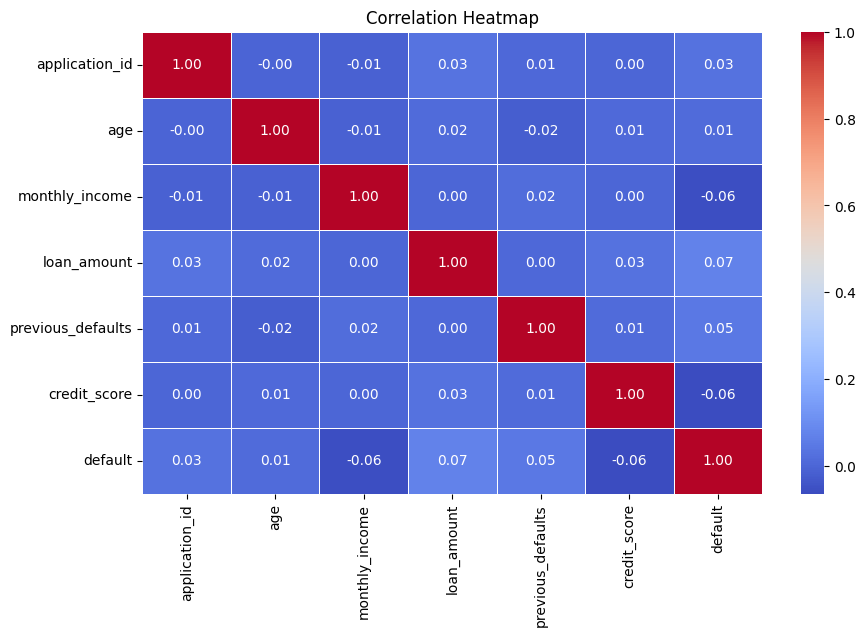

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()